In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\DGaard\Desktop\Gits\MoleculeSim\ownSim")

import forces as fc
import molecules as mc
import random

#%matplotlib widget

In [4]:
# Parameters for universe initialization
box_const_size = 500
box_size = np.array([box_const_size,box_const_size,box_const_size]) #max coordinate values for universe
num_molecules = 20
num_steps = 1000
radius  = 100
radii = [radius for _ in range(num_molecules)]

#other setup
seed = 1313

# Create Universe
# molecules = [mc.Molecule(np.array([random.uniform(0,box_size[0]), 
#                     random.uniform(0,box_size[1]), 
#                     random.uniform(0,box_size[2]) ]),radius) for _ in range(num_molecules)]

# print(len(molecules),molecules[0].pos)

# uni = mc.SimpleUniverse(molecules,seed)

uni = mc.SimpleUniverse(box_size,num_molecules,radii,seed,own_molecules=None)


In [5]:
points = []

# Perform Simulation
for i in range(num_steps):
  #randomly select a molecule
  mol = uni.select_molecule()
  #keep proposing new steps until one is accepted
  mc.step(uni,mol)
  #store intermediate results?
  points.append(uni.get_state())



KeyboardInterrupt: 

In [ ]:
[np.array([[100,100,100]])]

[array([[100, 100, 100]])]

In [ ]:
print(points)

[array([[280.91707128, 145.68407662, 422.28424201],
       [431.407069  , 158.37304251, 156.05536835],
       [319.20513643, 214.5149335 , 179.05561578],
       [307.82607097, 150.68543943, 271.39059512],
       [102.74340269, 492.45203597, 247.99881681],
       [141.77456873, 265.3304592 , 328.14053972],
       [368.62446363,  49.54487638, 165.9698896 ],
       [302.85170055, 422.75324488, 228.90070362],
       [212.59764929, 103.74197019, 191.01231184],
       [464.88743006, 291.44104078, 385.58710449],
       [116.3099695 , 456.00642129, 317.28797138],
       [185.60756708,  51.67630304,  21.73176749],
       [180.2883378 , 243.93319792, 433.98777466],
       [250.79983513, 459.38682332,  59.76696476],
       [488.82395097, 388.73805134,  60.59216639],
       [458.59988429,  68.10941589,  12.1661399 ],
       [253.15611641,  19.06660099, 345.64269713],
       [ 10.40369916, 209.51380697, 407.44480516],
       [173.42257669, 320.7618786 , 499.25544074],
       [ 18.02050923, 340.8557

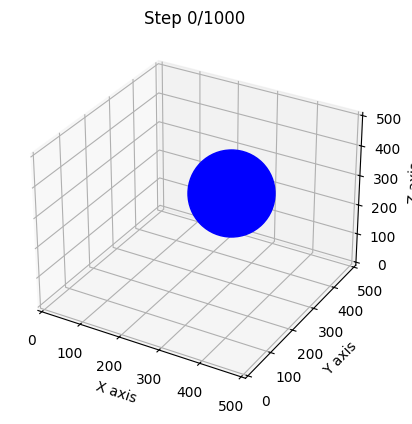

In [ ]:
#Plot each iteration of the simulation

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Generate sample data (list of 3D coordinates at different steps)
data = [np.array([[300,300,300]])]#points  # Random 3D coordinates

# Set up the figure and 3D axis
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

# Function to update the plot based on the selected step
def update_plot(frame):
    ax.clear()
    ax.set_title(f"Step {frame}/{num_steps}")
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_zlim3d(zmin=0,zmax=500)
    ax.set_xlim(0, box_size[0])  # Adjust as per your data range
    ax.set_ylim(0, box_size[0])  # Adjust as per your data range
    ax.set_zlim(0, box_size[0])  # Adjust as per your data range

    # Plot the 3D coordinates for the selected step
    
    x = data[frame][:, 0]
    y = data[frame][:, 1]
    z = data[frame][:, 2]



    ax.scatter(x, y, z, c='blue', marker='o',s=np.pi/8*radius**2)
    #plt.show()

update_plot(0)
# Create the animation
#ani = FuncAnimation(fig, update_plot, frames=num_steps, interval=20)
# Display the animation in the notebook
#HTML(ani.to_jshtml())
#ani.save('the_movie.mp4', writer = 'mencoder', fps=15)

#HTML(ani.to_html5_video())

#for i in range(num_steps):
#  update_plot(i)
    

In [ ]:
0/0

ZeroDivisionError: division by zero

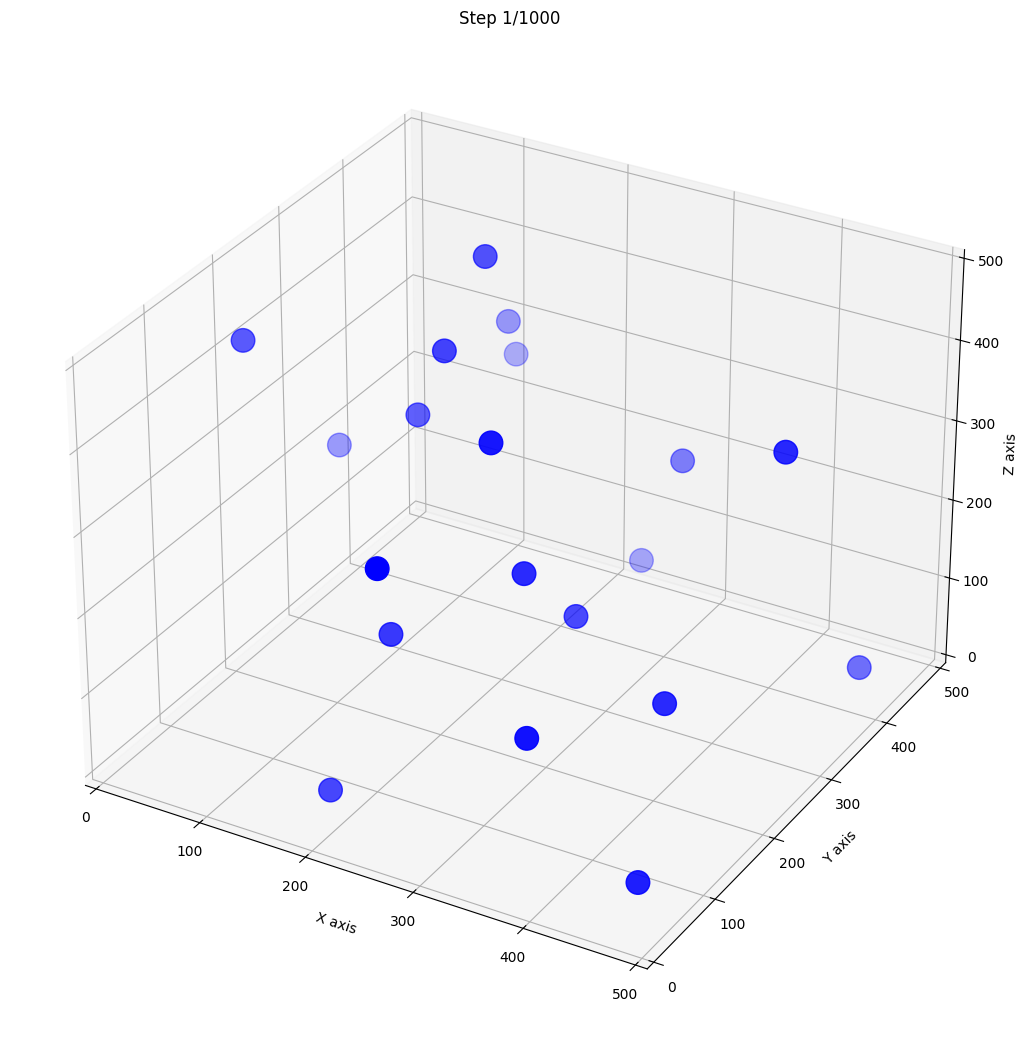

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Generate sample data (list of 3D coordinates at different steps)
data = points  # Random 3D coordinates

fig_size = 10
points_whole_ax = fig_size * 1 * 72    # 1 point = dpi / 72 pixels
points_radius = 2 * radius / box_size[0] * points_whole_ax

# Set up the figure and 3D axis
fig = plt.figure(figsize=(fig_size,fig_size))


ax = fig.add_subplot(111, projection='3d')#,position=[0.0, 0.0, 1, 1])

# Function to update the plot based on the selected step
def update_plot(frame):
    ax.clear()
    ax.set_title(f"Step {frame}/{num_steps}")
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_position([0.0, 0.0, 1, 1])
    ax.set_xlim(0, box_size[0])  # Adjust as per your data range
    ax.set_ylim(0, box_size[1])  # Adjust as per your data range
    ax.set_zlim(0, box_size[2])  # Adjust as per your data range

    #ax.set_box_aspect(1)


    # Plot the 3D coordinates for the selected step
    
    x = data[frame][:, 0]
    y = data[frame][:, 1]
    z = data[frame][:, 2]



    ax.scatter(x, y, z, c='blue', marker='o',s=points_radius)
    plt.show()

# Create the animation
#ani = FuncAnimation(fig, update_plot, frames=num_steps, interval=20)
# Display the animation in the notebook
#HTML(ani.to_jshtml())
#ani.save('the_movie.mp4', writer = 'mencoder', fps=15)

#HTML(ani.to_html5_video())
update_plot(1)

In [ ]:
from __future__ import absolute_import, division, print_function
from mayavi import mlab
import numpy as np
import math


xs = np.array([inner_list[0] for sublist in points for inner_list in sublist]).reshape((num_steps,num_molecules)) #[inner_list[0] for sublist in test for inner_list in sublist]
ys = np.array([inner_list[1] for sublist in points for inner_list in sublist]).reshape((num_steps,num_molecules))
zs = np.array([inner_list[2] for sublist in points for inner_list in sublist]).reshape((num_steps,num_molecules))

#mlab.points3d(0,0,0)
plt = mlab.points3d(points[0][:, 0], points[0][:, 1], points[0][:, 2], resolution = 50)
mlab.axes()
text_position = (0,0,0)
text_actor = mlab.text3d(500,150, 510, "TESTING", scale = 40, color = (0,0,0))
@mlab.animate(delay = 200, ui = True, support_movie = True) #delay = 100
def anim():
    f = mlab.gcf()
    while True:
        #temp = "step: "
        for step in range(num_steps):
            x = points[step][:, 0]
            y = points[step][:, 1]
            z = points[step][:, 2]
            plt.mlab_source.set(x=x, y=y, z=z)
            text_actor.text = f"Frame: {step}"
            
            yield


anim()
mlab.show()

********************************************************************************
         to build the TVTK classes (9.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************

